In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
av_df = pd.read_csv('avocado_mean.csv',index_col=0, parse_dates=['Date'])

In [8]:
av_df.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [5]:
av_df.shape

(169, 2)

Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [13]:
av_df.AveragePrice.rolling(3).mean().max().round(2)

1.85

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

Text(0.5, 1.0, 'График D')

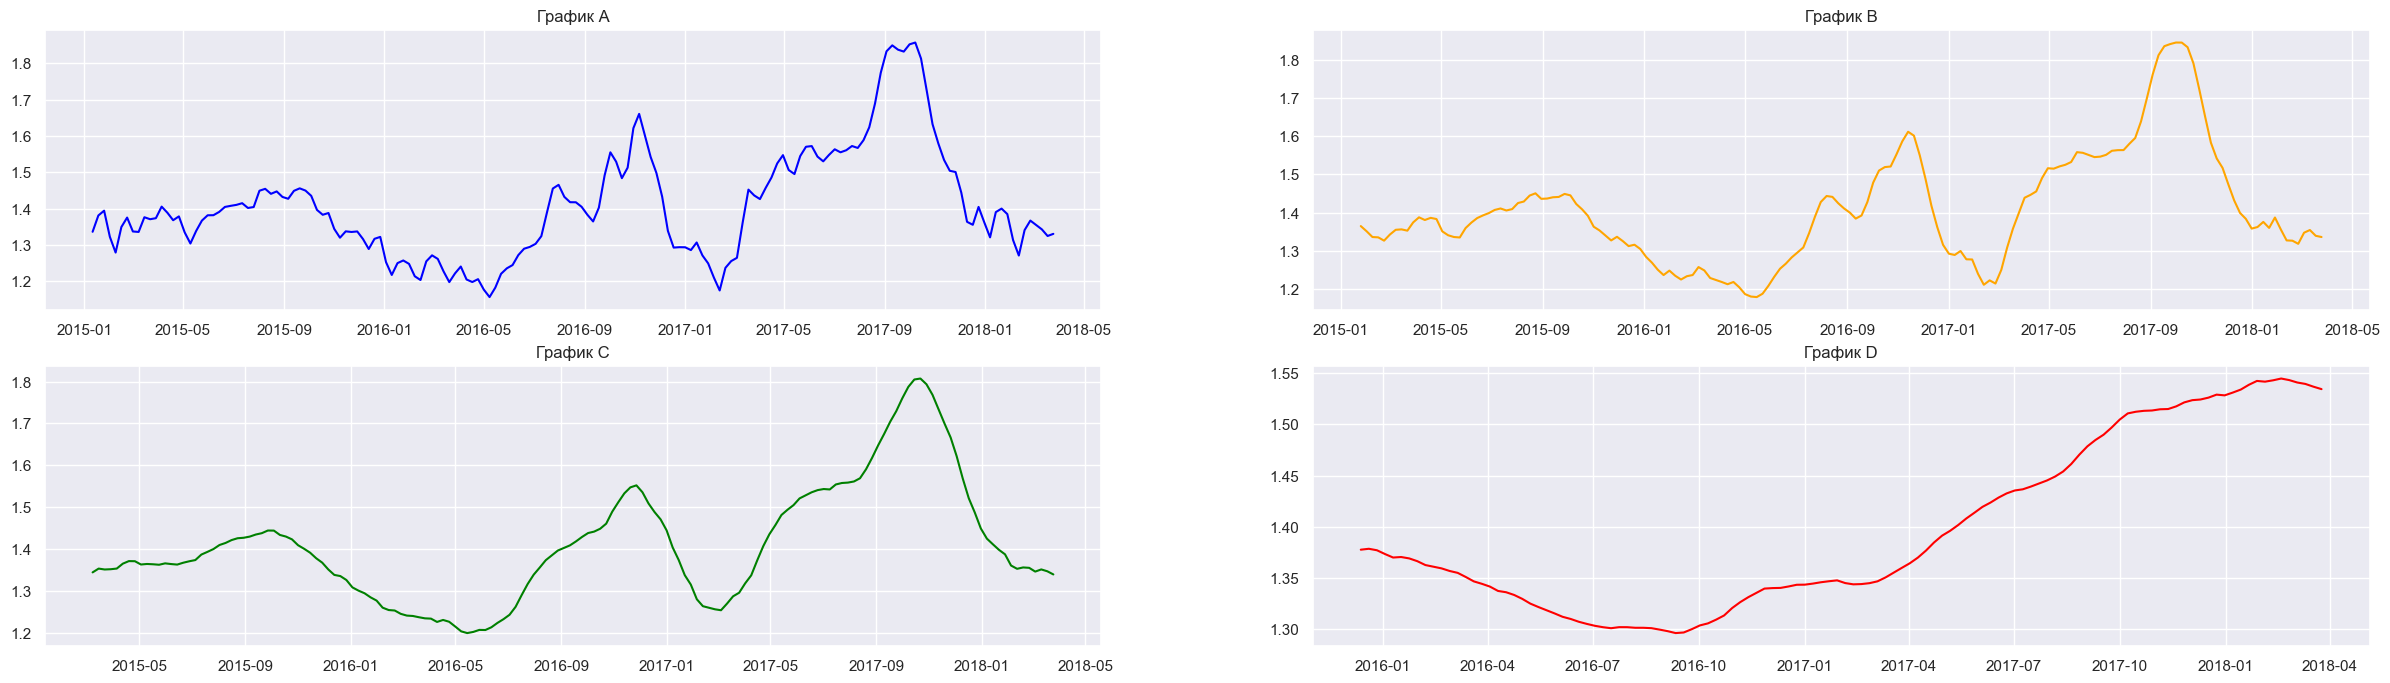

In [43]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)
sns.set_theme(rc={'figure.figsize':(30,8)})
axs[0,0].plot(av_df.AveragePrice.rolling(2).mean(),color='blue')
axs[0,0].set_title('График А')
axs[0,1].plot(av_df.AveragePrice.rolling(4).mean(),color='orange')
axs[0,1].set_title('График В')
axs[1,0].plot(av_df.AveragePrice.rolling(10).mean(),color='green')
axs[1,0].set_title('График С')
axs[1,1].plot(av_df.AveragePrice.rolling(50).mean(),color='red')
axs[1,1].set_title('График D')

Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [51]:
avocado_ewm = av_df.AveragePrice.ewm(span=2).mean()

И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [66]:
sns.set_theme(rc={'figure.figsize':(12,8)})

In [67]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0,parse_dates=['Date'])

In [82]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


<Axes: xlabel='Date'>

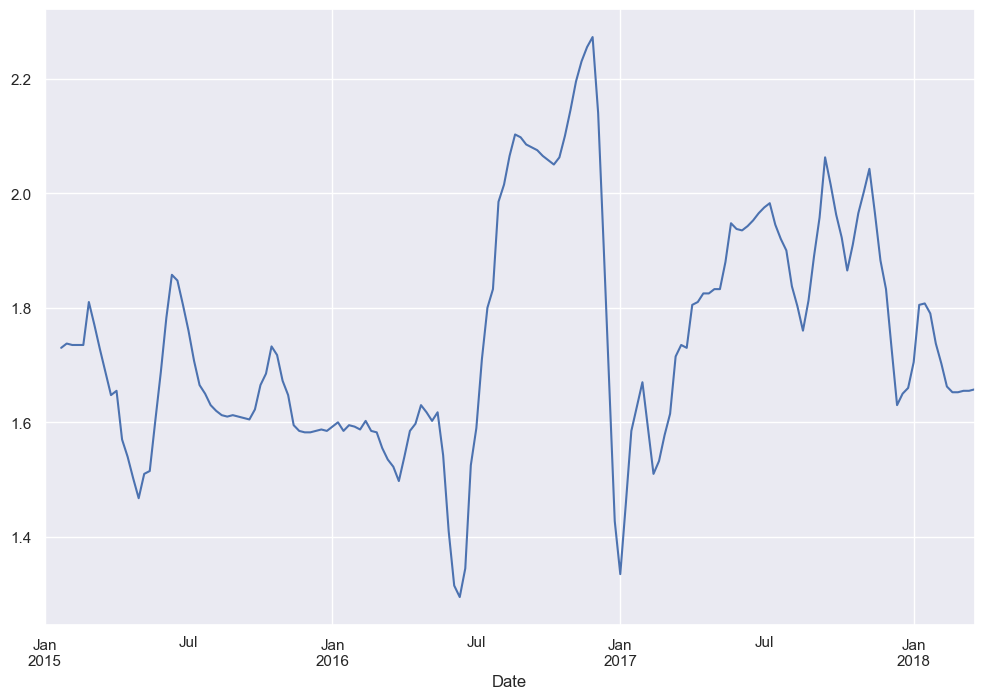

In [69]:
avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.rolling(4).mean()\
    .plot()
    

<Axes: xlabel='Date'>

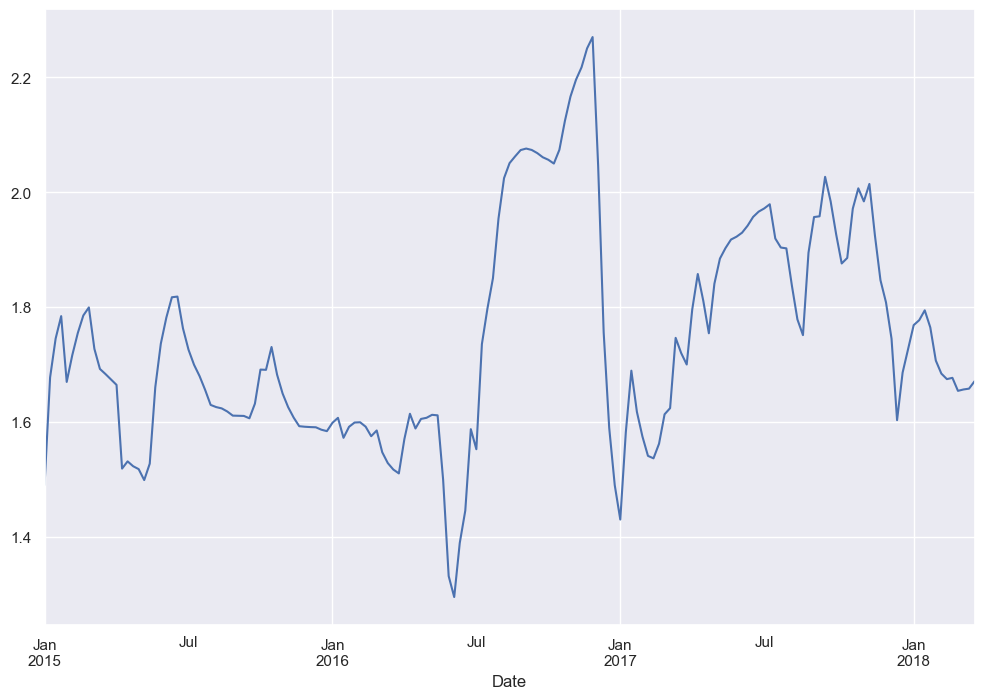

In [70]:
avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.ewm(span=4).mean()\
    .plot()

In [92]:
avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.rolling(4).mean()

Date
2015-01-04       NaN
2015-01-11       NaN
2015-01-18       NaN
2015-01-25    1.7300
2015-02-01    1.7375
               ...  
2018-02-25    1.6525
2018-03-04    1.6525
2018-03-11    1.6550
2018-03-18    1.6550
2018-03-25    1.6575
Name: AveragePrice, Length: 169, dtype: float64

In [104]:
pd.DataFrame(avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.rolling(4).mean())\
    .query('Date == "2016-08-21"').round(3)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\4246569363.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query('Date == "2016-08-21"').round(3)


,AveragePrice
Date,
2016-08-21,2.102


In [108]:
pd.DataFrame(avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.rolling(4).mean())\
    .query('Date == "2017-02-19"').round(3)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\503559528.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query('Date == "2017-02-19"').round(3)


,AveragePrice
Date,
2017-02-19,1.533


In [91]:
avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.ewm(span = 4).mean()

Date
2015-01-04    1.490000
2015-01-11    1.677500
2015-01-18    1.745102
2015-01-25    1.784118
2015-02-01    1.669563
                ...   
2018-02-25    1.676654
2018-03-04    1.653992
2018-03-11    1.656395
2018-03-18    1.657837
2018-03-25    1.670702
Name: AveragePrice, Length: 169, dtype: float64

In [105]:
pd.DataFrame(avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.ewm(span = 4).mean())\
    .query('Date == "2016-08-21"').round(3)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\1241204203.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query('Date == "2016-08-21"').round(3)


,AveragePrice
Date,
2016-08-21,2.062


In [106]:
pd.DataFrame(avocado_full\
    .query('type=="organic" and region =="Chicago"')\
    .AveragePrice.ewm(span = 4).mean())\
    .query('Date == "2017-02-19"').round(3)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\2913005284.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query('Date == "2017-02-19"').round(3)


,AveragePrice
Date,
2017-02-19,1.562


Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:

Прочитайте эти данные. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

In [205]:
df = pd.read_csv('delays.csv')

In [206]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [207]:
df.delay = df.delay.str.replace('-', '')

In [208]:
df['delay'] = pd.to_timedelta(df['delay'])

In [209]:
df

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [210]:
df['delay_categorical'] = pd.cut(df.delay,bins=4)

In [211]:
df.delay_categorical.unique()

[(1 days 06:23:34.250000, 2 days 12:12:47.500000], (3 days 18:02:00.750000, 4 days 23:51:14], (0 days 00:27:11.587000, 1 days 06:23:34.250000], (2 days 12:12:47.500000, 3 days 18:02:00.750000]]
Categories (4, interval[timedelta64[ns], right]): [(0 days 00:27:11.587000, 1 days 06:23:34.250000] < (1 days 06:23:34.250000, 2 days 12:12:47.500000] < (2 days 12:12:47.500000, 3 days 18:02:00.750000] < (3 days 18:02:00.750000, 4 days 23:51:14]]

💀 Сложное задание! 💀

Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
 'more than 3 days' – больше 3 дней

In [212]:
# bins = pd.to_timedelta([1,2,3,5,10])
# bins

In [213]:
df['delay_categorical'] = pd.cut(df.delay,bins=4, labels=['less than 1 day','1-2 days','2-3 days','more than 3 days'])

In [214]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


In [215]:
# задание не решено / отработать

Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

In [217]:
import plotly.express as px

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\2457226932.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




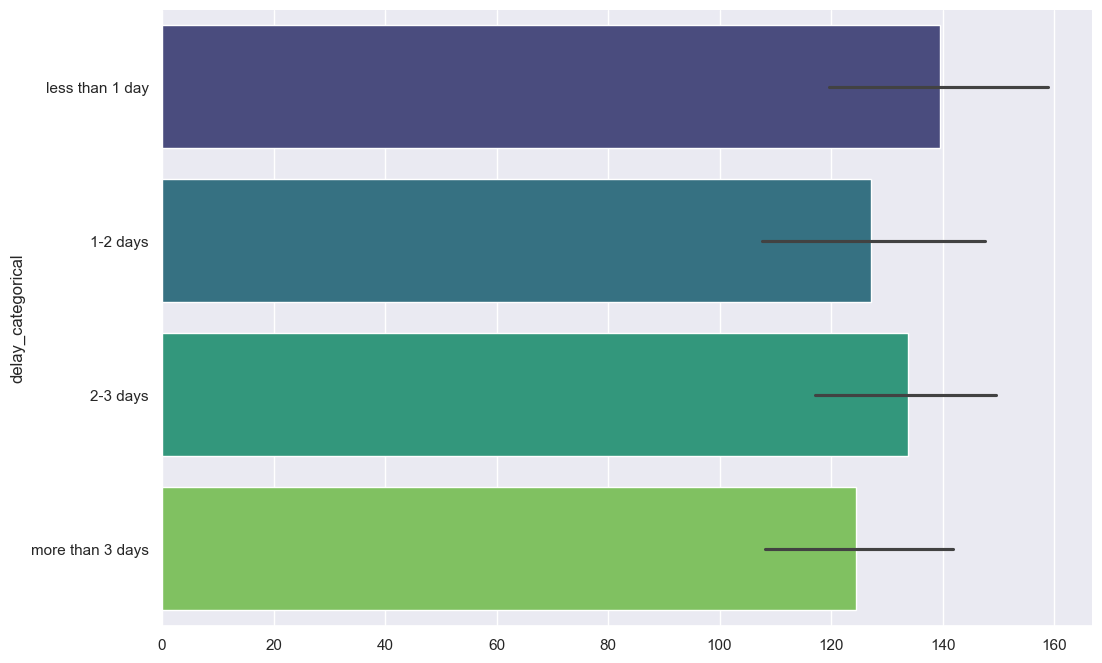

In [228]:
sns.barplot(df.delay_categorical, palette='viridis')
sns.despine()

In [229]:
# задание не решено, отработать!

In [230]:
# miniproject

In [455]:
ads_df = pd.read_csv('ads_data.csv',parse_dates=['date'])

In [457]:
ads_df.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [335]:
#ads_data.csv – данные взаимодействий с рекламными объявлениями

# date – дата
# time – время
# event – действие (просмотр/клик)
# platform – платформа
# ad_id – id объявления
# client_union_id – id рекламного кабинета
# campaign_union_id – id рекламной кампании
# ad_cost_type – тип оплаты
# ad_cost – цена
# has_video – есть ли видео
# target_audience_count – размер аудитории

In [450]:
ads_client_df = pd.read_csv('ads_clients_data.csv',parse_dates=['date','create_date'])

In [337]:
# ads_clients_data.csv – характеристики рекламных клиентов

# date – дата
# client_union_id – id рекламного кабинета
# community_id – id сообщества
# create_date – дата создания рекламного клиента

In [338]:
ads_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [339]:
ads_df.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [340]:
ads_data_by_ad.click.mean().round(), ads_data_by_ad.view.mean().round()

AttributeError: 'DataFrame' object has no attribute 'click'

Давайте посмотрим на распределение показов объявлений!

По оси x – число показов
По оси y – доля объявлений с такими показами
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график:

In [342]:
ax = sns.displot(np.log(ads_data_by_ad.view),kde = True)

AttributeError: 'DataFrame' object has no attribute 'view'

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [400]:
test = pd.DataFrame(ads_df\
    .query('event=="view"')\
    .groupby(['date','ad_id'])\
    .agg({'event':'count'}))

In [421]:
test_1 = test.groupby('date').mean()
test_1

,event
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [422]:
test_2 = test_1.rolling(2).mean().round()
test_2

,event
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

C:\Users\Alex\AppData\Local\Temp\ipykernel_10052\1218089001.py:3: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



<Axes: xlabel='date'>

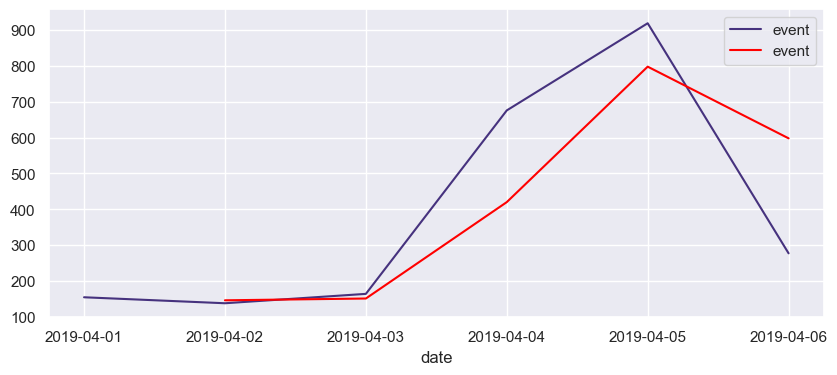

In [426]:
plt.figure(figsize=(10,4))
sns.lineplot(test_1)
sns.lineplot(test_2, palette=['red', 'blue'])

In [427]:
n_df = test_1.merge(test_2,on='date', how='left')

In [430]:
n_df['diff_mean'] = abs(n_df['event_x']-n_df['event_y'])

In [432]:
n_df.sort_values(by='diff_mean',ascending=False)

,event_x,event_y,diff_mean
date,,,
2019-04-06,277.122727,598.0,320.877273
2019-04-04,675.901720,420.0,255.901720
2019-04-05,919.109677,798.0,121.109677
2019-04-03,163.952778,151.0,12.952778
2019-04-02,137.786982,146.0,8.213018
2019-04-01,154.482270,NaN,NaN


Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [452]:
ads_client_df.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [434]:
ads_df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [444]:
full_df = ads_df.merge(ads_client_df, on=['client_union_id'], how='inner')

In [447]:
full_df.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22


In [463]:
full_df['time_delta'] = full_df['date_y']-full_df['create_date'] / np.timedelta64(1, 'D')

ValueError: only leading negative signs are allowed